<h1><center>Exercise Series 1 Sean Gowen </center></h1>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

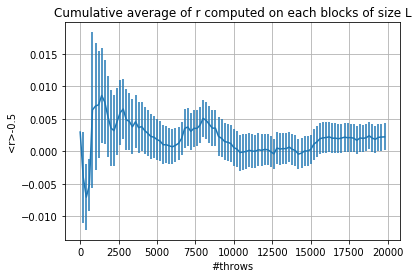

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
    
# Opening the file with the cpp generated pseudo-random numbers
with open("../Parallel_random_generator/random_out.txt") as data_in:
  data_array = [float(i) for i in data_in]

    
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)


throws = 20000 #total number of throws
num_blocks = 100 #number of block (number of samples we make)
throws_block = int(throws/num_blocks)

# defining x, x_block and r to plot it in a graph and for sampling
x = np.arange(0,throws,1)
x_block = np.arange(0,num_blocks,1)
r = np.zeros(throws) # random values r


average = np.zeros(num_blocks)
average_squared = np.zeros(num_blocks)
cumul_average = np.zeros(num_blocks)
cumul_average_squared = np.zeros(num_blocks)

uncertainty = np.zeros(num_blocks)

# saving (sampling) the content of the first block into an array (array in python?) 
i = 0
for element in data_array:
    if i>(throws-1):
        break
    r[i] = element
    i +=1

# to store the values of the sum on each block
sum_test = np.zeros(num_blocks)
sum_x = np.zeros(num_blocks)

i=0
while i<throws:
    for j in range(num_blocks):
        for k in range(int(throws_block)):
            sum_x[j] += r[i]
            i +=1
        
# average of r in one block
for i in range(num_blocks):
    average[i]=sum_x[i]/throws_block
    average_squared[i] = (sum_x[i]/throws_block)**2

for i in range(num_blocks):
    for j in range(i+1):
        cumul_average[i]+=average[j]
        cumul_average_squared[i]+=average_squared[j]
    cumul_average[i] /= (i+1)
    cumul_average_squared[i] /= (i+1)
    uncertainty[i] = error(cumul_average, cumul_average_squared, i)


x_block *= throws_block # try to determine what exactly this means


plt.title("Cumulative average of r computed on each blocks of size L")
plt.xlabel("#throws")
plt.ylabel("<r>-0.5")
plt.errorbar(x_block, cumul_average-0.5, yerr=uncertainty)
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

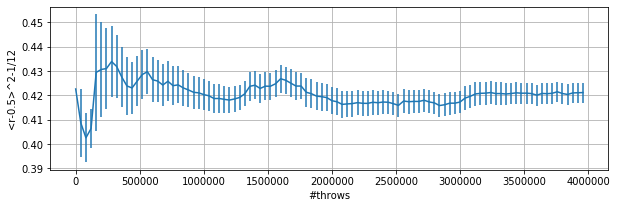

In [2]:
# Re-initializing the variables
average = np.zeros(num_blocks)
average_squared = np.zeros(num_blocks)
cumul_average = np.zeros(num_blocks)
cumul_average_squared = np.zeros(num_blocks)

uncertainty = np.zeros(num_blocks)

i=0
while i<throws:
    for j in range(num_blocks):
        for k in range(int(throws_block)):
            sum_x[j] += r[i]-0.5
            i +=1
            
# average of r in one block
for i in range(num_blocks):
    average[i]=sum_x[i]/throws_block
    average_squared[i] = (sum_x[i]/throws_block)**2
    

for i in range(num_blocks):
    for j in range(i+1):
        cumul_average[i]+=average[j]
        cumul_average_squared[i]+=average_squared[j]
    cumul_average[i] /= (i+1)
    cumul_average_squared[i] /= (i+1)
    uncertainty[i] = error(cumul_average, cumul_average_squared, i)
    
    
x_block *= throws_block # try to determine what exactly this means

plt.figure(figsize=(10, 3))


plt.xlabel("#throws")
plt.ylabel("<r-0.5>^2-1/12")
plt.errorbar(x_block, cumul_average-1/12, yerr=uncertainty)
plt.grid(True)
plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

Total number of throws (observations) in the input file:  1000000
Number of observations taken into account (per block): 10000
Number of different categories:  100
expected count:  100.0


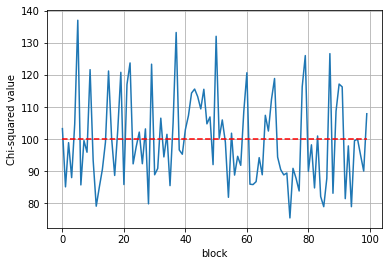

In [3]:
M = 100 # Number of identical sub-intervals (number of different outcome category)
throws = 10000
number_observations = throws

print("Total number of throws (observations) in the input file: ", len(data_array))
print("Number of observations taken into account (per block):", number_observations)

prob_event = 1/M # Probability of a single event on a uniform distribution of M possible outcomes
categories = np.zeros(M) # "Zeros" array of the size of the number of categories
chi_squared_values = np.zeros(100)

# "categories" is now [0.01 , 0.02, ... , 1.0]
for i in range(M):
    categories[i] = (i+1)/M
    
print("Number of different categories: ", len(categories))
    
# Two columns table for counting the occurences on each category
observed_values = np.array([categories, np.zeros(M)])

expected_count = number_observations*prob_event
print("expected count: ", expected_count)

def chi_squared(M, observed_values, expected_count):
    sum_temp = 0
    for i in range(M):
        sum_temp += (observed_values[1,i] - expected_count)**2/expected_count
    return sum_temp

def counting_occurences(M, throws, index_start, index_end):
    for j in range(M):
        occurences = 0
        for k in range(index_start, index_end, 1):
            if (data_array[k] >= (j)/M and data_array[k] <=(j+1)/M):
                occurences += 1
        observed_values[1,j]= occurences
    return observed_values

index_start = 0
index_end = 10000
for i in range(100):
    observed_values = counting_occurences(M, throws, index_start, index_end)
    chi_squared_values[i] = chi_squared(M, observed_values, expected_count)
    index_start = index_end
    index_end += 10000

reference = 100*np.ones(100)
plt.xlabel("block")
plt.ylabel("Chi-squared value")
plt.plot(chi_squared_values)
plt.plot(reference, 'r--')
plt.grid(True)
plt.show()

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

In [4]:
# Reading the file "random_exponential_out.txt" and saving its content into an array
with open("../Parallel_random_generator/random_exponential_out.txt") as data_in:
  data_exp_array = [float(i) for i in data_in]

# Reading the file "random_lorentzian_out.txt" and saving its content into an array
with open("../Parallel_random_generator/random_lorentzian_out.txt") as data_in:
  data_lorentz_array = [float(i) for i in data_in]

# Creating three histograms to check that the respective expected distributions are observed
# The generation of the three distributions (especially the Lorentzian) substantially slows down the rendenring.
# One can uncomment the lines below for debugging purposes

# This loop downsizes the "data_lorentz_array" in case it is larger than 10^5 inputs
# to make it easier to display on the debugging histogram

#if len(data_lorentz_array) > 100000:
#    data_lorentz_array_short = np.zeros(100000)
    
#    for i in range(100000):
#        data_lorentz_array_short[i] = data_lorentz_array[i]

#plt.hist(data_array, bins = 100, ec= 'black')
#plt.show()

#plt.hist(data_exp_array, bins = 100, ec='black')
#plt.show()

#plt.hist(data_lorentz_array_short, bins = 45000, ec='black')
#plt.axis([-100, 100, 0, 55000])
#plt.show()

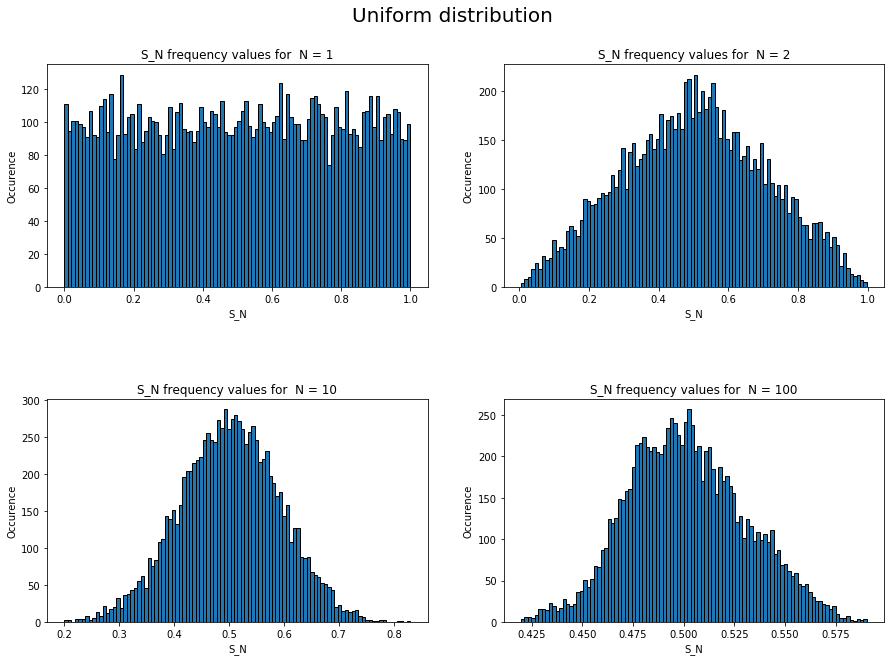

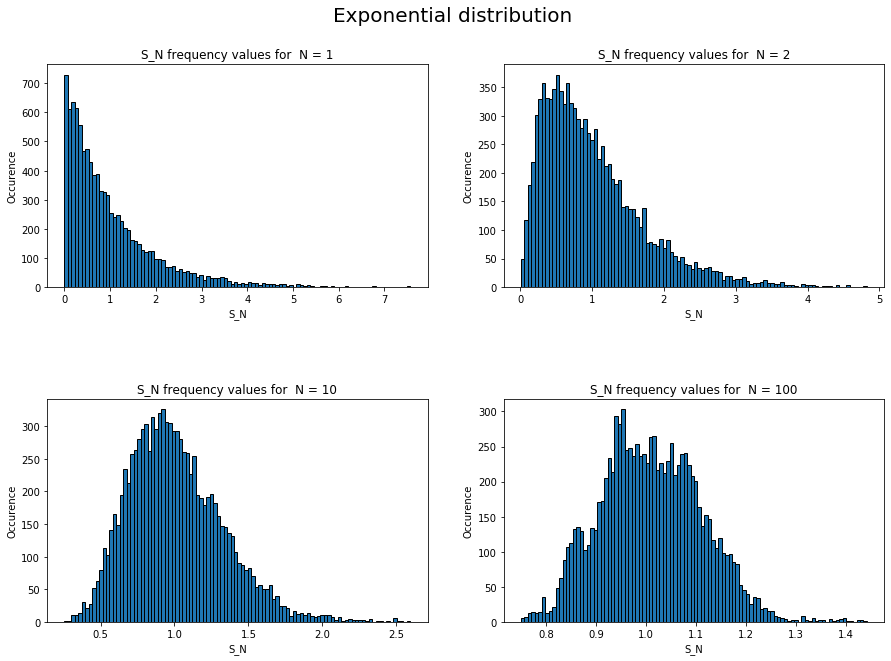

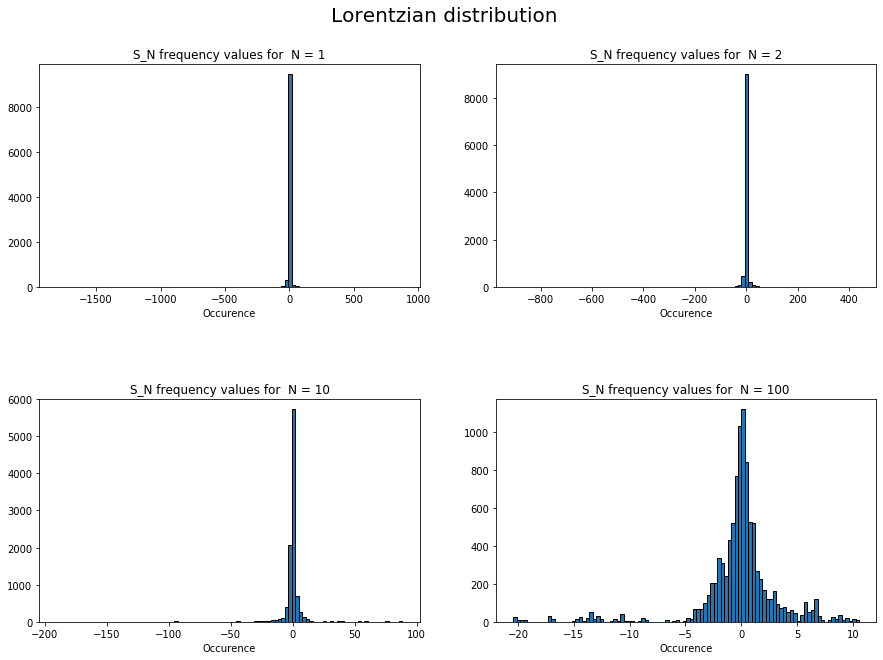

In [5]:
# Checking the central limit theorem
realizations = 10000


# CHECK IF THIS PROCEDURE IS REALLY THE CENTRAL LIMIT THEOREM
def summations(realizations, n_range, data_array):
    sum_values = np.zeros(realizations)
    for i in range(realizations):
        sum_tempo = 0
        for j in range(n_range):
            sum_tempo += data_array[i+(j+1)]/n_range
        sum_values[i] = sum_tempo
    return sum_values


fig, axs = plt.subplots(2,2, squeeze=False, figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=0.5)

axs[0,0].hist(summations(realizations, 1, data_array), bins=100, ec='black')
axs[0,0].set_title('S_N frequency values for  N = 1')
axs[0,0].set_xlabel('S_N')
axs[0,0].set_ylabel('Occurence')
axs[0,1].hist(summations(realizations, 2, data_array), bins=100, ec='black')
axs[0,1].set_title('S_N frequency values for  N = 2')
axs[0,1].set_xlabel('S_N')
axs[0,1].set_ylabel('Occurence')
axs[1,0].hist(summations(realizations, 10, data_array), bins=100, ec='black')
axs[1,0].set_title('S_N frequency values for  N = 10')
axs[1,0].set_xlabel('S_N')
axs[1,0].set_ylabel('Occurence')
axs[1,1].hist(summations(realizations, 100, data_array), bins=100, ec='black')
axs[1,1].set_title('S_N frequency values for  N = 100')
axs[1,1].set_xlabel('S_N')
axs[1,1].set_ylabel('Occurence')
plt.suptitle('Uniform distribution', fontsize=20)
plt.show()


fig, axs = plt.subplots(2,2, squeeze=False, figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=0.5)

axs[0,0].hist(summations(realizations, 1, data_exp_array), bins=100, ec='black')
axs[0,0].set_title('S_N frequency values for  N = 1')
axs[0,0].set_xlabel('S_N')
axs[0,0].set_ylabel('Occurence')
axs[0,1].hist(summations(realizations, 2, data_exp_array), bins=100, ec='black')
axs[0,1].set_title('S_N frequency values for  N = 2')
axs[0,1].set_xlabel('S_N')
axs[0,1].set_ylabel('Occurence')
axs[1,0].hist(summations(realizations, 10, data_exp_array), bins=100, ec='black')
axs[1,0].set_title('S_N frequency values for  N = 10')
axs[1,0].set_xlabel('S_N')
axs[1,0].set_ylabel('Occurence')
axs[1,1].hist(summations(realizations, 100, data_exp_array), bins=100, ec='black')
axs[1,1].set_title('S_N frequency values for  N = 100')
axs[1,1].set_xlabel('S_N')
axs[1,1].set_ylabel('Occurence')
plt.suptitle('Exponential distribution', fontsize=20)
plt.show()

fig, axs = plt.subplots(2,2, squeeze=False, figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=0.5)

axs[0,0].hist(summations(realizations, 1, data_lorentz_array), bins=100, ec='black')
axs[0,0].set_title('S_N frequency values for  N = 1')
axs[0,0].set_xlabel('S_N')
axs[0,0].set_xlabel('Occurence')
axs[0,1].hist(summations(realizations, 2, data_lorentz_array), bins=100, ec='black')
axs[0,1].set_title('S_N frequency values for  N = 2')
axs[0,1].set_xlabel('S_N')
axs[0,1].set_xlabel('Occurence')
axs[1,0].hist(summations(realizations, 10, data_lorentz_array), bins=100, ec='black')
axs[1,0].set_title('S_N frequency values for  N = 10')
axs[1,0].set_xlabel('S_N')
axs[1,0].set_xlabel('Occurence')
axs[1,1].hist(summations(realizations, 100, data_lorentz_array), bins=100, ec='black')
axs[1,1].set_title('S_N frequency values for  N = 100')
axs[1,1].set_xlabel('S_N')
axs[1,1].set_xlabel('Occurence')
plt.suptitle('Lorentzian distribution', fontsize=20)
plt.show()

### Plot fitting for the case N = 100

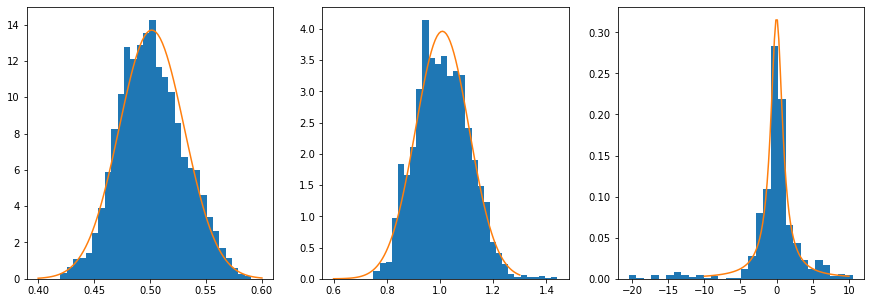

In [6]:
import numpy as np
from scipy.stats import norm
from scipy.stats import cauchy
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,3, squeeze=False, figsize=(15,5))

data = summations(realizations, 100, data_array)
mean,std=norm.fit(data)

axs[0,0].hist(data, bins=30, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(0.4, 0.6, 100)
y = norm.pdf(x, mean, std)
axs[0,0].plot(x, y)

data_exp = summations(realizations, 100, data_exp_array)
mean,std=norm.fit(data_exp)

axs[0,1].hist(data_exp, bins=30, density=True)
x = np.linspace(0.6, 1.3, 100)
y = norm.pdf(x, mean, std)
axs[0,1].plot(x, y)

data_lorentz = summations(realizations, 100, data_lorentz_array)
#mean,std=cauchy.fit(data_exp)

axs[0,2].hist(data_lorentz, bins=30, density=True)
x = np.linspace(-10, 10, 100)
y = cauchy.pdf(x)
axs[0,2].plot(x, y)

plt.show()

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### Buffon's experiment: 

- A needle of lenght $L$ is thrown onto an horizontal area on which straight parallel lines are drawn. That surface must have been a lined hardwood floor in the original experiment. The space $d$ between the lines must NOT be much greater than $L$. The condition $L<<d$ is then EXCLUDED.

- The following question arises: what is the probability $P$ that the needle intersects one of the lines?
- Buffon realised that by throwing many needles on the surface he was able to determine $P$.
- He also showed analytically that the probability could be determined with the following formula:

$$
P = \frac{2L}{\pi d}
$$

To simulate a needle we set the position of the needle tip with random coordinates $(x_{rand},y_{rand})$
The position of the other tip of the needle depends on a random cosine value $cos(\theta_{rand})$ and the lenght of the needle $L$, so that its coordinates are given by:

$$
\begin{cases}
x &= x_{rand} + L \cdot cos(\theta_{rand})\\
y &= y_{rand} + L \cdot (1-cos(\theta_{rand}))
\end{cases}
$$

Note that the random value $cos(\theta_{rand})$ is really a cosine value (i.e between 0 and 1), not a radom angle. 

In [7]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def error(sum_temp_prog, sum_squares_temp_prog, n):
    if n == 0:
        return 0
    else:
        return math.sqrt((sum_squares_temp_prog[n] - sum_temp_prog[n]**2)/n)

def generating_random_dataset(option, index_start):
    x_rand = np.zeros(N)
    y_rand = np.zeros(N)
    cos_theta_rand = np.zeros(N)
    if option == 'cpp':
        with open("Parallel_random_generator/random_out.txt") as data_in:
            data_array_x = [float(i) for i in data_in] 
        with open("Parallel_random_generator/random_out2.txt") as data_in:
            data_array_y = [float(i) for i in data_in]
        with open("Parallel_random_generator/random_out3.txt") as data_in:
            data_array_cos_theta = [float(i) for i in data_in]

        for i in range (len(data_array_x)):
            if i>=len(x_rand) or i+index_start>=len(x_rand):
                break
            else:
                x_rand[i] = 10*data_array_x[i+index_start]

        for i in range (len(data_array_y)):
            if i>=len(y_rand) or i+index_start>=len(y_rand):
                break
            else:
                y_rand[i] = 10*data_array_y[i+index_start]

        for i in range (len(data_array_cos_theta)):
            if i>=len(cos_theta_rand) or i+index_start>=len(cos_theta_rand):
                break
            else:
                cos_theta_rand[i] = data_array_cos_theta[i+index_start]
                
        return x_rand, y_rand, cos_theta_rand        
        
    elif option == 'python':
        x_rand = 10*np.random.random(N)
        y_rand = 10*np.random.random(N)
        cos_theta_rand = np.random.random(N)
        
        return x_rand, y_rand, cos_theta_rand

            
def statistics (throws, blocks):    
    throws_per_block = int(throws/blocks)
    pi_average = np.zeros(blocks)
    pi_average_squares = np.zeros(blocks)
    sum_temp_prog = np.zeros(blocks)
    sum_squares_temp_prog = np.zeros(blocks)
    uncertainty = np.zeros(blocks)

    j = 0
    k = 0
    for i in range(blocks):
        sum_temp = 0
        for j in range(throws_per_block):
            k += 1
            sum_temp += buffon_experiment(L, d, throws, 'stats', k)
        pi_average[i] = sum_temp/throws_per_block
        pi_average_squares[i] = (sum_temp/throws_per_block)**2
        
    for i in range(blocks):
        for j in range(i):
            sum_temp_prog[i] += pi_average[i]
            sum_squares_temp_prog[i] += pi_average_squares[i] 
        sum_temp_prog[i] /= (i+1)
        sum_squares_temp_prog[i] /= (i+1)
        uncertainty[i] = error(sum_temp_prog, sum_squares_temp_prog, i)
        
    return pi_average, uncertainty

Throws: 30
Number hits: 9


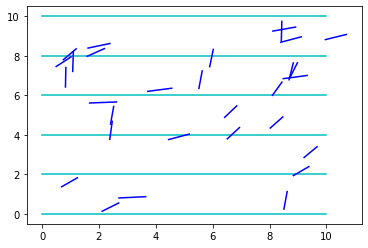

Second experiment: 
Throws: 30
Number hits: 9


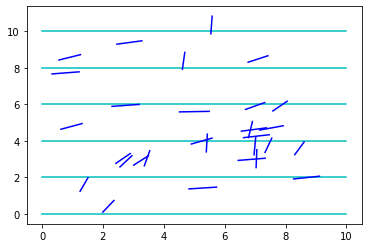

In [8]:
L = 1 # Lenght of the needle
d = 2 # Distance between the lines
N = 30 # Number of throws

# If video == 'video' the function plots a visual simulation of the experiment
# If video == 'hide' the function computes instead the numerical approximation of pi and displays the result
# It is recomended to set video = 'hide' when the number of throws is large (e.g. throws > 1000)
def buffon_experiment(L, d, N, video, index_start):

    x_rand = generating_random_dataset('python', index_start)[0]
    y_rand = generating_random_dataset('python', index_start)[1]
    cos_theta_rand = generating_random_dataset('python', index_start)[2]
    
    x_f = x_rand + L*cos_theta_rand
    y_f = y_rand + L*(1-cos_theta_rand)

    x_range = np.arange(0,10,1)
    horizontal_line0 = 0*np.ones(11)
    horizontal_line1 = 2*np.ones(11)
    horizontal_line2 = 4*np.ones(11)
    horizontal_line3 = 6*np.ones(11)
    horizontal_line4 = 8*np.ones(11)
    horizontal_line5 = 10*np.ones(11)

    x = np.array([x_rand,x_f])
    y = np.array([y_rand,y_f])


    # Find some way to detect an intersection
    cases = [2,4,6,8,10]
    N_hits = 0

    for j in range(len(cases)):
        for i in range(N):
            if (y_rand[i]<cases[j] and y_f[i]>cases[j]) or (y_rand[i]>cases[j] and y_f[i]<cases[j]):
                #print('intersection with '+str(cases[j]))
                N_hits += 1
            if y_rand[i] == cases[j] or y_f[i] == cases[j]:
                N_hits += 1

    # Is there an efficient way to determine the intersection coordinates?

    if video == 'video':
        print('Throws: '+str(N))
        print('Number hits: '+str(N_hits))
        plt.figure()
        #plt.scatter(x_rand, y_rand) # use for debugging
        plt.plot(horizontal_line0, 'c-')
        plt.plot(horizontal_line1, 'c-')
        plt.plot(horizontal_line2, 'c-')
        plt.plot(horizontal_line3, 'c-')
        plt.plot(horizontal_line4, 'c-')
        plt.plot(horizontal_line5, 'c-')
        plt.plot(x,y, color='b')
        #plt.scatter(x,y) # use for debugging
        plt.show()
        
    elif video == 'hide':
        print('Throws: '+str(N))
        print('Number hits: '+str(N_hits))
        if N_hits !=0:
            pi_approx = (2*L*N)/(N_hits*d)
            print('Pi approximation : '+str(pi_approx))
        
    elif video == 'stats':
        #stats_option()
        if N_hits !=0:
            pi_approx = (2*L*N)/(N_hits*d)
            return pi_approx
        else:
            return 0
        
buffon_experiment(L, d, N, 'video', 1)
print('Second experiment: ')
buffon_experiment(L, d, N, 'video', 30)

In [9]:
L = 1 # Lenght of the needle
d = 2.55 # Distance between the lines
N = 100000 # Number of throws

buffon_experiment(L, d, N,'hide', 1)

Throws: 100000
Number hits: 25118
Pi approximation : 3.1225166234978747


##### Trying the same simulation again but with a dataset of random numbers generated with "Parallel_random_generator"

- Not conclusive: the random values for the needles' coordinates repeat themselves. This is probably due to fact that every simulation, that is, every time the function "buffon_experiment()" is called, the program starts to read the first value of the dataset array then proceeds with the same sequence as before.

- One way to solve this could be by shifting the starting index by some arbitrary value.

- A more optimal alternative could be to create $n$ datasets (text files) generated from $n$ runs of "Parallel_random_generator"

##### Computing the approximation of $\pi$ along with its uncertainty (standard deviation and mean)

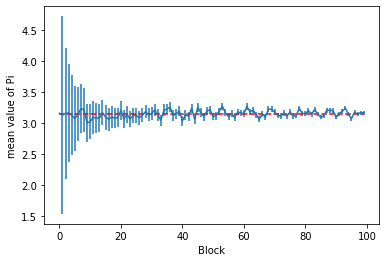

In [10]:
throws = 1000
blocks = 100

x = np.arange(blocks)
reference = 3.14159265359*np.ones(blocks)

plt.figure()
plt.ylabel('mean value of Pi')
plt.xlabel('Block')
plt.errorbar(x, statistics(throws, blocks)[0], statistics(throws, blocks)[1])
plt.plot(reference, 'r--')
plt.show()